In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from util import get_transforms, get_image_size

np.random.seed(1)
%reload_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
dataset = 'CIFAR10'
image_size = get_image_size(dataset)
transform, reverse_transform = get_transforms(image_size=image_size[1:])

In [3]:
def plot_revere_diffusion_imgs(infer_samples, idx, ax):
    image = infer_samples[idx][-1]
    ax.imshow(image)
    ax.axis('off')

In [4]:
infer_samples, ood_detect_result = torch.load('./results/test_ood_detection_power_cifar10_299_3.pt')
detect_timesteps = np.linspace(0, 1000, 10, endpoint=False).astype(int)
len(ood_detect_result)/len(detect_timesteps)

100.0

In [5]:
detect_r = []
for i in range(100):
    ind = False
    for j, timestep in enumerate(detect_timesteps):
        if ood_detect_result[i*len(detect_timesteps)+j][0]:
            ind = True
    detect_r.append(ind)

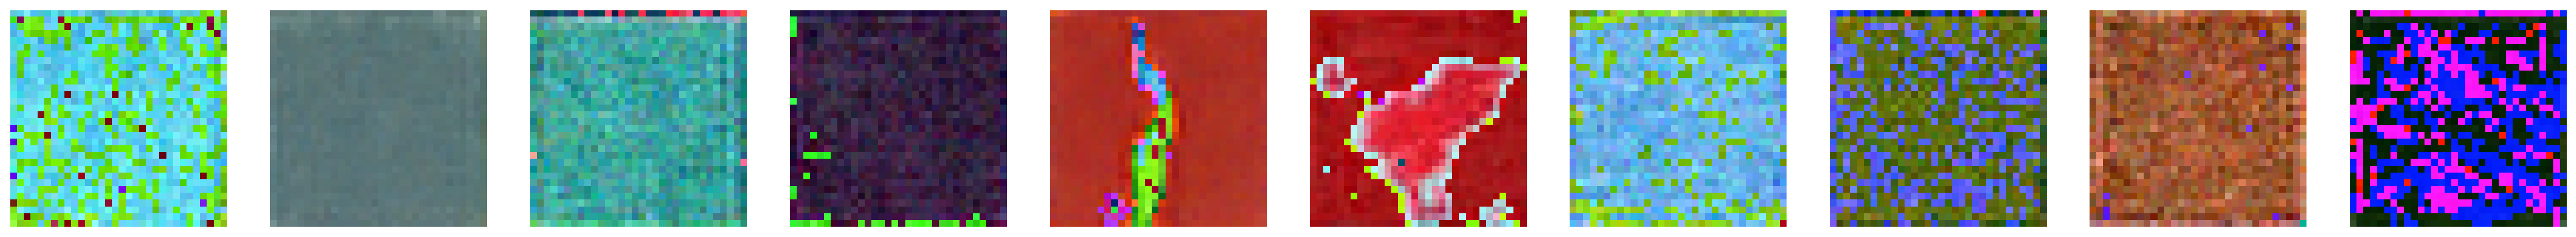

In [9]:
fig, axes = plt.subplots(1, 10, figsize=(32, 320))
for i, idx in enumerate(np.arange(0,100,1)[detect_r][:10]):
    plot_revere_diffusion_imgs(infer_samples, idx, axes[i])
plt.savefig('figures/ood_cifar10.png', dpi=100, bbox_inches='tight')

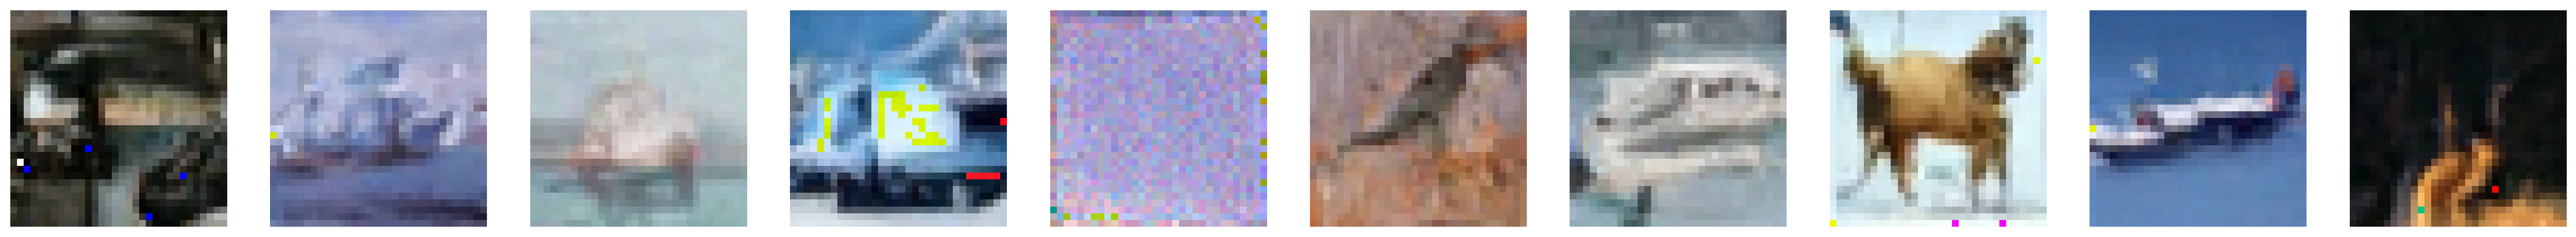

In [10]:
np.random.seed(1)
fig, axes = plt.subplots(1, 10, figsize=(32, 320))
for i, idx in enumerate(np.random.choice(100, 10, replace=False)):
    plot_revere_diffusion_imgs(infer_samples, idx, axes[i])
plt.savefig('figures/id_cifar10.png', dpi=100, bbox_inches='tight')